# Homework 4

In [ ]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

## 1. Shallow V.S Deep Neural Network

### a. Generate the simulated data first using following equation. Sample 120k data as X from uniform distribution [-2*Pi, 2*Pi], then feed the sampled X into the equation to get Y. Randomly select 60K as training and 60 K as testing.

Generate simulated data

In [ ]:
# Sample data
X = np.random.uniform((-2)*math.pi, 2*math.pi, 120000)

# Feed equation to get Y
def feed_equation(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 2*((2*(math.cos(values[i])**2) - 1)**2) - 1
    return output
values = X
Y = feed_equation(X)

# Divide into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [ ]:
len(X_train)

60000

In [ ]:
y_train

array([ 0.99999645,  0.90540041, -0.55940133, ..., -0.57036973,
        0.68736152,  0.53511064])

### b. Train 3 versions of Neural Network, with different numbers of hidden layer (NN with 1 hidden layer, 2 hidden layers and 3 hidden layers), using Mean squared error as objective function and error measurement.

In [ ]:
# Neural network (1 hidden layer)
model_1 = Sequential()
model_1.add(Dense(10, input_dim = 1, kernel_initializer = "normal", activation = "relu"))
model_1.add(Dense(1, kernel_initializer = "normal", activation = "linear"))

# Specify loss function and optimizer
model_1.compile(optimizer="Adam", loss="mse", metrics=["mse"])


In [ ]:
# Neural network (2 hidden layers)
model_2 = Sequential()
model_2.add(Dense(10, input_dim = 1, kernel_initializer = "normal", activation = "relu"))
model_2.add(Dense(8, activation="relu"))
model_2.add(Dense(1, kernel_initializer = "normal", activation = "linear"))

# Specify loss function and optimizer
model_2.compile(optimizer="Adam", loss="mse", metrics=["mse"])

In [ ]:
# Neural network (3 hidden layers)
model_3 = Sequential()
model_3.add(Dense(10, input_dim = 1, kernel_initializer = "normal", activation = "relu"))
model_3.add(Dense(8, activation="relu"))
model_3.add(Dense(4, activation="relu"))
model_3.add(Dense(1, kernel_initializer = "normal", activation = "linear"))

# Specify loss function and optimizer
model_3.compile(optimizer="Adam", loss="mse", metrics=["mse"])

In [ ]:
model_1

In [ ]:
# Train model
history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=64)
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=64)
history_3 = model_3.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 2s 1ms/step - loss: 0.5004 - mse: 0.5004
Epoch 2/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4997 - mse: 0.4997
Epoch 3/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4970 - mse: 0.4970
Epoch 4/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4995 - mse: 0.4995
Epoch 5/100
938/938 [==============================] - 1s 1ms/step - loss: 0.5009 - mse: 0.5009
Epoch 6/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4981 - mse: 0.4981
Epoch 7/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4968 - mse: 0.4968
Epoch 8/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4970 - mse: 0.4970
Epoch 9/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4951 - mse: 0.4951
Epoch 10/100
938/938 [==============================] - 1s 1ms/step - loss: 0.4955 - mse: 0.4955
Epoch 11/100
938/938 [=================

In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

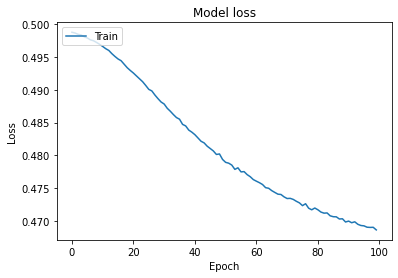

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['loss']) 
#plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Number of Units') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

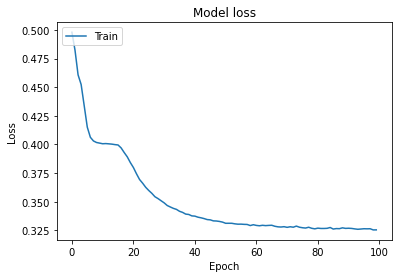

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['loss']) 
#plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Number of Units') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

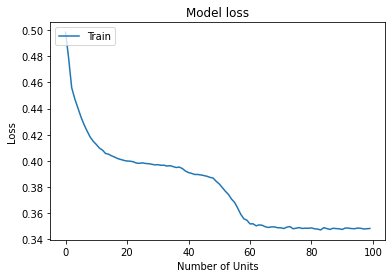

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_3.history['loss']) 
#plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Number of Units') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### c. For each version, try different number of neurals in your NN and replicate the following left plot (source: https://ojs.aaai.org/index.php/AAAI/article/view/10913). (You don’t need to replicate exactly same results below but need to show the performance difference of 3 versions of Neural Networks)

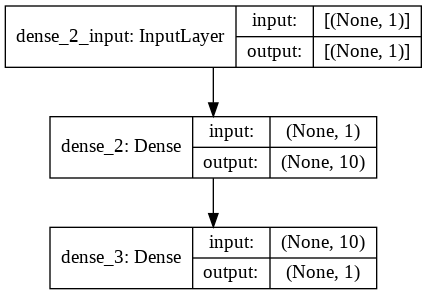

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True, show_layer_names=True)


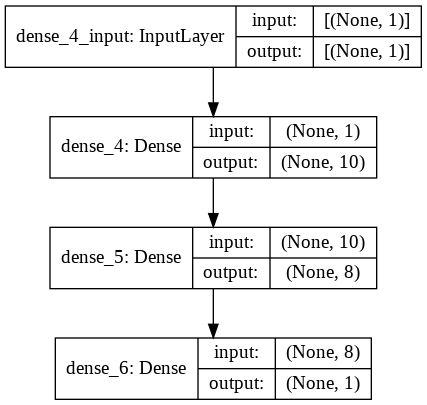

In [ ]:
plot_model(model_2, show_shapes=True, show_layer_names=True)


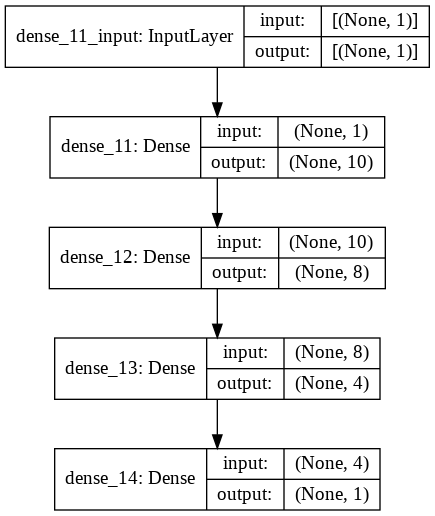

In [ ]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

## 2. 

### This is an Image classification exercise. We will play with an expired Kaggle competition, please follow the rule of Kaggle and check the following page for more information https://www.kaggle.com/c/dogs- vs-cats-redux-kernels-edition/overview. After submit you results, use screenshot to show you score (see image below). They don’t provide ranking for this competition anymore. Thus, no need to show your ranking at Public/Private Leaderboard. (Name formation of your submission: MSBA.SessionX.Yourname, please replace X and Yourname with the correct string) using the screenshot on the Private Leaderboard, along with the description of your solutions and the codes (ipynb formation is highly encouraged) as the final submission.

In [1]:
# Import packages
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16
import zipfile
import os
from random import shuffle
from glob import glob


In [2]:
# Unzip files
with zipfile.ZipFile('/content/sample_data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/importeddata/')
    
with zipfile.ZipFile('/content/sample_data/test.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/importeddata/')

In [3]:
# Label images
def get_label(path):
  label = []
  for f in os.listdir(path):
    if (f.split(".")[0] == "dog"):
      label.append(str(1))
    elif (f.split(".")[0] == "cat"):
      label.append(str(0))
  return label 

label = get_label("../content/importeddata/train")

# Label path
def get_path(p):
    path = []
    for files in os.listdir(p):
        path.append(files)
    return path

train_path = get_path('../content/importeddata/train')
test_path = get_path('../content/importeddata/test')

# Convert to dataframe
df_train = pd.DataFrame({"image_name": train_path, "label":label})
df_train.head()

,image_name,label
0,cat.944.jpg,0
1,cat.7409.jpg,0
2,dog.2307.jpg,1
3,cat.5896.jpg,0
4,dog.9517.jpg,1


In [4]:
df_test = pd.DataFrame({"image_name": test_path})
df_test.head()
df_test.shape

(12500, 1)

In [5]:
# Split train and valid
from sklearn.model_selection import train_test_split

df_trainsplit, df_valid = train_test_split(df_train, test_size = 0.5, stratify = df_train["label"], random_state = 123)
print(df_trainsplit.shape, df_valid.shape)

(12500, 2) (12500, 2)


In [6]:
# Preprocess images
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

dg_train = ImageDataGenerator(rotation_range = 10,
                              zoom_range = 0.1, 
                              horizontal_flip = True,
                              fill_mode = "nearest",
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              preprocessing_function = preprocess_input)

g_train = dg_train.flow_from_dataframe(df_trainsplit, 
                                       directory = "../content/importeddata/train",
                                       x_col = "image_name",
                                       y_col = "label",
                                       target_size = (224, 224),
                                       batch_size = 64,
                                       class_mode = "binary")

dg_valid = ImageDataGenerator(preprocessing_function = preprocess_input)

g_valid = dg_valid.flow_from_dataframe(df_valid, 
                                       directory = "../content/importeddata/train",
                                       x_col = "image_name",
                                       y_col = "label",
                                       target_size = (224, 224),
                                       batch_size = 64,
                                       class_mode = "binary")

Found 12500 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames belonging to 2 classes.


In [7]:
# Build model
from keras.models import Sequential
from keras.applications.resnet import ResNet50
from keras.layers import Dense

model = Sequential()
model.add(ResNet50(include_top = False, pooling = "max", weights = "imagenet"))
model.add(Dense(1, activation = "sigmoid"))
model.layers[0].trainable = False

# Compile model
model.compile(optimizer = "Adam", metrics = ["accuracy"], loss = "binary_crossentropy")


94773248/94765736 [==============================] - 2s 0us/step


In [8]:
# Train model
from keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint(filepath = "dogcat.weights.best.hdf5",
                                save_best_only = True, 
                                save_weights_only = True)

model.fit(g_train,
          #, batch_size=64 
          epochs = 7 
          #validation_data = g_valid,
          #callbacks = [cp]
          )

Epoch 1/7
196/196 [==============================] - 2125s 11s/step - loss: 1.6704 - accuracy: 0.7973
Epoch 2/7
196/196 [==============================] - 2031s 10s/step - loss: 0.1139 - accuracy: 0.9720
Epoch 3/7
196/196 [==============================] - 2024s 10s/step - loss: 0.1024 - accuracy: 0.9775
Epoch 4/7
196/196 [==============================] - 2005s 10s/step - loss: 0.0801 - accuracy: 0.9816
Epoch 5/7
196/196 [==============================] - 1996s 10s/step - loss: 0.0740 - accuracy: 0.9832
Epoch 6/7
196/196 [==============================] - 1990s 10s/step - loss: 0.0613 - accuracy: 0.9839
Epoch 7/7
196/196 [==============================] - 1991s 10s/step - loss: 0.0690 - accuracy: 0.9842


In [9]:
 test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_gen = test_datagen.flow_from_dataframe(df_test, directory = '../content/importeddata/test/', 
                                            batch_size = 64, 
                                            x_col = 'image_name', y_col = None, 
                                            class_mode = None, 
                                            shuffle = False,
                                            img_size = (224, 224))

Found 12500 validated image filenames.


In [10]:
prediction = model.predict(test_gen)
prediction = prediction.clip(min = 0.005, max = 0.995)

In [12]:
prediction

array([[0.005],
       [0.005],
       [0.995],
       ...,
       [0.005],
       [0.005],
       [0.005]], dtype=float32)

In [13]:
submission_df = pd.read_csv('../content/sample_data/sample_submission.csv')

for i, fname in enumerate(test_path):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    submission_df.at[index-1, 'label'] = prediction[i]
submission_df.to_csv('Cats&DogsSubmission.csv', index=False)